# <span style="color:darkseagreen"> **Tarea 3 Física Computacional**</span>
#### Dehesa Corona Valeria Carolina 
*Elaborado en Jupyter Notebook*


#### Bibliotecas adicionales:

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from pylab import *
import matplotlib.patches as mpatches
from numpy import diff
from scipy.integrate import *

#Para la barra interactiva del 3
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

**1. En clase vimos el método de Euler mejorado en el que nosotros introducimos el Jacobiano de forma
analítica para ser evaluado por el método de integración. Realice una función que implemente el
mismo método de integración, pero en lugar de calcular el Jacobiano con una función que lo evalúa
analíticamente, ahora sea calculado de manera numérica utilizando la derivación numérica.**

Copiamos las funciones desarrolladas en el Notebook 8 de la clase, para comparar el resultado del mismo ejercicio con nuestra nueva matriz.

La función Euler mejorado implementa el siguiente algoritmo: $$\vec{x}_{n+1} = \vec{x}_n + \delta \vec{g}(\vec{x}_n, t_n) + \frac{1}{2}\delta^2 \mathbb{J}*(\vec{x}_n, t_n) . \vec{g}*(\vec{x}_n, t_n)$$

donde $\mathbb{J}* =(\mathbb{J}, \frac{\partial g}{\partial g})$ y $\vec{g}* = (\vec{g}, 1)$ 

In [2]:
def Euler_mejorado(edo,p_ini,t,jacob):
    # Este solo tiene J y g sin dependencia temporal.
    sol = zeros((len(t),len(p_ini)))
    sol[0,:] = p_ini
    delta = t[1]-t[0]
    for i in range(0,len(t)-1):
        sol[i+1,:] = sol[i,:] + delta*edo(sol[i,:],t[i])
        #sol[i+1,:] += 0.5*(delta**2)*(jacob *edo(sol[i,:],t[i])) # ojo sistema autonomo
        sol[i+1,:] += 0.5*(delta**2)*dot(jacob,edo(sol[i,:],t[i])) # ojo sistema autonomo
    return sol

def Euler_1(edo,p_ini,t):
    sol = zeros((len(t),len(p_ini)))
    sol[0,:] = p_ini
    delta = t[1]-t[0]
    for i in range(0,len(t)-1):
        sol[i+1,:] = sol[i,:] + delta*edo(sol[i,:],t[i])
    return sol

def modelo_exp(P,t,a=0.1):
    return a*P

def circ_1(xy,t):
    dx = -xy[1]
    dy = xy[0]
    return array([dx,dy])

Hacemos nuestro método numérico para encontrar la matriz Jacobiana. Funciona para $n=2$, para generalizar a toda $n$, agregaríamos una nueva función fi a la función definida F_s y alteraríamos el for definido abajo.

In [3]:
def F_s(x):
    f1 = - (x[1])
    f2 =(x[0])   
    return np.array([f1, f2])

def jac_num(x):
    h = 1e-10 #Pasito 
    n = len(x) #Longitud del arreglo que será el tamaño de la Jacobiana
    Jac = np.zeros((n, n)) #Inicializamos matriz resultante

    for i in range(n):
        x1 = np.zeros(n)
        x2 = np.zeros(n)
        x1[i] = x[i] + h #Paso hacia adelante en cada entrada de vector x
        x2[i] = x[i] - h #Paso hacia atrás

        f1 = F_s(x1)
        f2 = F_s(x2)

        Jac[ : , i] = (f1 - f2) / (2 * h) #Valores en la columa i de Jacobiana

    return Jac

inicial = np.array([1.0,0.0])
jac_num(inicial)

array([[ 0.        , -1.        ],
       [ 1.00000008,  0.        ]])

Que coincide con la Jacobiana anlítica vista en clase. Ahora resolvemos el mismo ejercicio que en el Notebook 8, pero utilizando nuestra nueva Jacobiana numérica.

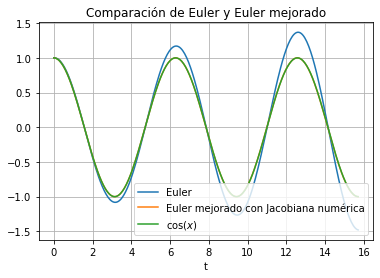

In [4]:
tiempo = arange(0,5*pi,0.05)
solucion = Euler_1(circ_1,[1,0],tiempo)
solucion_mejor = Euler_mejorado(circ_1,[1,0],tiempo,jac_num(inicial))
title("Comparación de Euler y Euler mejorado"),xlabel("t")
plot(tiempo,solucion[:,0],label="Euler")
plot(tiempo,solucion_mejor[:,0],label="Euler mejorado con Jacobiana numérica")
plot(tiempo,cos(tiempo),label="$\cos(x)$")
legend(),grid()
show()

**2.Utilizando los integradores de Euler mejorado con Jacobiano analítico, Euler mejorado con Jacobiano
numérico, Runge-Kutta de 2◦ orden y Runge-Kutta de 4◦ orden, encuentre un paso de integración que
proporcione una precisión de $10^{−4}$ en la solución para la siguiente ecuación:**

$$\dddot{y} + \ddot{y}^{2} - 3\dot{y}^{3} + \cos^2{y} = e^{−t}\sin(3t)$$


**Con condiciones iniciales $\ddot{y}(1) = 1$, $\dot{y}(1) = 2$, $y(1) = 1$. En particular que sucede en el intervalo $t \in [1, 2]$ y $t \in [1, 2.1]$**


Comenzamos haciendo $\dot{y}=x$

$$
\rightarrow \ddot{x}+\dot{x}^{2}-3x^3+cos^{2} y= e^{-t} sin(3t)
$$

Ahora, hacemos $\dot{x}=z$

$$
\rightarrow \dot{z}+z^{2}-3x^3+cos^{2} y= e^{-t} sin(3t)
$$

Entonces la ecuación diferencial ordinaria a resolver es:

$$
\dot{z}= e^{-t} sin(3t)-cos^{2}(y) +3x^3-z^{2}
$$

Como $\dot{y}=x, \dot{x}=\ddot{y}=z \rightarrow z(1)=1,x(1)=1,y(1)=1$

Si ahora calculamos nuestras derivadas para el jacobiano, éste queda de la siguiente forma: $f_1 = \dot{y}=x, f_2 = \ddot{y} = z, f_3 = \dddot{y} = e^{-t} sin(3t)-cos^{2}(y) +3x^3-z^{2} $

$$
\mathcal{J*}= \left( \begin{matrix}
                    0 & 1 & 0 & 0 \\
                    0 & 0 & 1 & 0 \\
                     9x^2 & sin(2y) & -2z & -e^{-t}(3cos(3t)-sin(3t)) 
                    \end{matrix} \right)
$$

Por lo que mis sistemas de ecuaciones quedan de la siguiente manera:

In [5]:
#función de mis sistemas de ecuaciones:
def fun1_es(v, t):
    dx_1 = v[2]
    dx_2 = v[0]
    dx_3 = -v[2]*v[2] + 3*v[0]*v[0]*v[0] - cos(v[1])*cos(v[1]) + exp(-t)*sin(3*t)
    return (np.array([dx_1, dx_2, dx_3, 1], dtype=np.float)) #El uno es para hacer cuadrada la matriz

#definimos mi función del jacobiano:
def jacob_2(v, t):
    J = np.zeros([3,4])
    J[0,1] = 1.0
    J[1,2] = 1.0
    J[2,0] = 9*(v[0]**2)
    J[2,1] = sin(2*(v[1]))
    J[2,2] =-2*v[2]
    J[2,3] = -exp(-t)*(3*cos(3*t)+sin(3*t))
    return J

Tomamos la función definida en el notebook 9 para tamaño generalizado de Jacobiano:

In [6]:
def Euler_mejorado_J_t(edo,p_ini,t,jacob):
    # J y g con dependencia temporal.
    sol = zeros((len(t),len(p_ini)))
    sol[0,:] = p_ini
    delta = t[1]-t[0]
    for i in range(0,len(t)-1):
        eval_edo = edo(sol[i,:],t[i])
        if len(eval_edo) == len(p_ini):
            sol[i+1,:] = sol[i,:] + delta*eval_edo
        else:
            sol[i+1,:] = sol[i,:] + delta*eval_edo[0:-1]
        sol[i+1,:] += 0.5*(delta**2) *dot( jacob(sol[i,:],t[i]) , eval_edo )
    return sol

In [7]:
def RK_2(edo,x_ini,t):
    sol = zeros( (len(t) , len(x_ini)) )
    sol[0,:] = x_ini
    delta = t[1]-t[0]
    for i in range(0,len(t)-1):
        k1 = sol[i,:] + 0.5*delta*edo(sol[i,:],t[i])
        sol[i+1,:] = sol[i,:] + delta*edo(k1,t[i]+0.5*delta)
    return sol

def RK_4(edo,x_ini,t):
    sol = zeros( (len(t) , len(x_ini)) )
    sol[0,:] = x_ini
    delta = t[1]-t[0]
    for i in range(0,len(t)-1):
        k1 = edo(sol[i,:],t[i])
        k2 = edo(sol[i,:] + 0.5*delta*k1 , t[i] + 0.5*delta)
        k3 = edo(sol[i,:] + 0.5*delta*k2 , t[i] + 0.5*delta)
        k4 = edo(sol[i,:] + delta*k2 , t[i] + delta)
        sol[i+1,:] = sol[i,:] + (delta/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)
    return sol

Aplicamos las funciones a un rango de tiempo que se aproxima con 10^{-4} de error al punto donde la función "se quiebra". Agregamos las condiciones iniciales dadas y agregamos $t=0$ tiempo.

In [8]:
tiempo = arange(1, 1.76999, 0.001) 
solucion_2a = Euler_mejorado_J_t(fun1_es, [2,1,1], tiempo, jacob_2)
solucion_2b = RK_2(fun1_es, [2,1,1,0], tiempo) 
solucion_2c = RK_4(fun1_es, [2,1,1,0], tiempo)

Graficamos los distintos métodos:

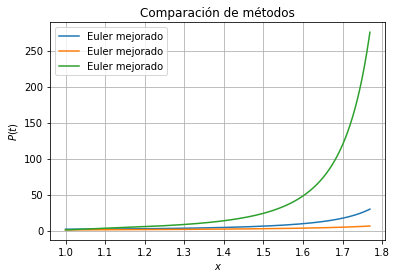

In [9]:
title("Comparación de métodos"),xlabel("$x$"),ylabel("$P(t)$")
plot(tiempo,solucion_2a,label="Euler mejorado")
grid(), legend()
show()

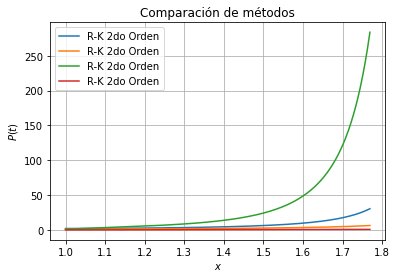

In [10]:
title("Comparación de métodos"),xlabel("$x$"),ylabel("$P(t)$")
plot(tiempo,solucion_2b,label="R-K 2do Orden")
grid(), legend()
show()

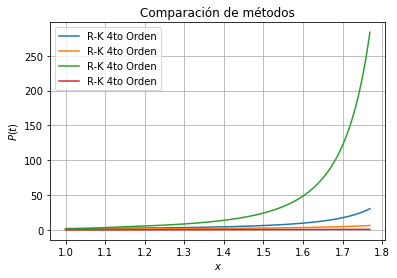

In [11]:
title("Comparación de métodos"),xlabel("$x$"),ylabel("$P(t)$")
plot(tiempo,solucion_2c,label="R-K 4to Orden")
grid(), legend()
show()

Ahora revisamos el segundo intervalo, que sería después del 1.77 (donde la función se quiebra).

In [12]:
tiempo2 = arange(1.8, 2.1, 0.01) 
solucion_2a2 = Euler_mejorado_J_t(fun1_es, [2,1,1], tiempo2, jacob_2)
solucion_2b2 = RK_2(fun1_es, [2,1,1,0], tiempo2)
solucion_2c2 = RK_4(fun1_es, [2,1,1,0], tiempo2)

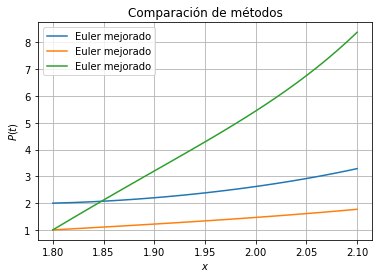

In [13]:
title("Comparación de métodos"),xlabel("$x$"),ylabel("$P(t)$")
plot(tiempo2,solucion_2a2,label="Euler mejorado")
grid(), legend()
show()

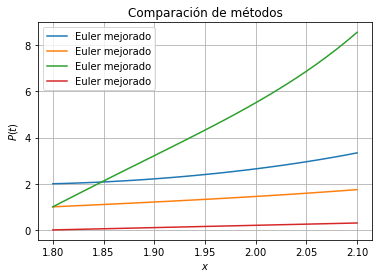

In [14]:
title("Comparación de métodos"),xlabel("$x$"),ylabel("$P(t)$")
plot(tiempo2,solucion_2b2,label="Euler mejorado")
grid(), legend()
show()

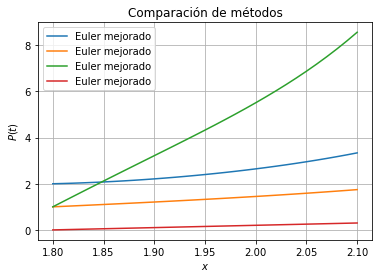

In [15]:
title("Comparación de métodos"),xlabel("$x$"),ylabel("$P(t)$")
plot(tiempo2,solucion_2c2,label="Euler mejorado")
grid(), legend()
show()

**3. Modifique las funciones integradoras que programamos en clase (Euler mejorado, Runge-Kutta de 2◦
orden y Runge-Kutta de 4◦ orden) para que se puedan pasar argumentos opcionales al sistema de
ecuaciones diferenciales de tal manera que se puedan modificar parámetros al momento de hacer la
integración. Una vez hecho esto, obtenga la solución de la siguiente ecuación diferencial**

$$\ddot{x} +\frac{1}{10} \dot{x} +4\sin{x} = \frac{1}{2}\sin(\omega t)$$

**Con condiciones iniciales $\dot{x}(0) = 1$ y $x(0) = 0$ y para $\omega = \{1, 1.1, 1.2, 1.3, \dots , 2.9, 3 \}$. Realice la gráfica de algunas soluciones que representen el comportamiento de la solución en función de $\omega$ y explique su resultado. La solución debe tener una precisión de por lo menos $10^{−5}$**

Comenzamos haciendo $\dot{x}=y$:

$$
\dot{y}+\frac{1}{10}y+4sinx=\frac{1}{2}sin(\omega t)
$$

Encontramos su matriz jacobiana: 

$$
\mathcal{J*}= \left( \begin{matrix}
0 & 1 & 0\\
-4cos(x) & \frac{1}{10} & \frac{\omega}{2}sin(\omega t)
\end{matrix} \right)
$$

Implementamos el sistema de ecuaciones de la siguiente manera y lo utilizamos en el graficador interactivo para $\omega$ parámetro. Una vez más complementamos todo con las funciones de los Notebooks :)


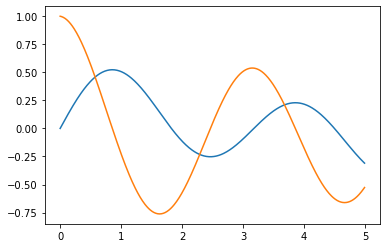

In [16]:
#Definimos mi nuevo sistema de edo
def funcion3(f, t, w=1):
    dx = f[1]
    ddx = 0.5*sin(w*t)-0.1*f[1]-4*sin(f[0])
    return np.array([dx, ddx, 1], dtype = np.float64)

#Definimos el jacobiano de mi sistema
def jacobiano3(f, t, w=1):
    J = np.zeros([2,3])
    J[0,1] = 1
    J[1,0] = -4*cos(f[0])
    J[1,1] = -0.1
    J[1,2] = -0.5*w*sin(w*t)
    return J

#Euler mejorado Jacobiano analítico
def Euler_mejorado_J_tx(edo,p_ini,t,jacob):
    # J y g con dependencia temporal.
    sol = zeros((len(t),len(p_ini)))
    sol[0,:] = p_ini
    delta = t[1]-t[0]
    for i in range(0,len(t)-1):
        eval_edo = edo(sol[i,:],t[i])
            #eval_edo_int = [int(i) for i in eval_edo]
        if len(eval_edo) == len(p_ini):
            sol[i+1,:] = sol[i,:] + delta*eval_edo
        else:
            sol[i+1,:] = sol[i,:] + delta*eval_edo[0:-1]
        sol[i+1,:] += 0.5*(delta**2) *dot( jacob(sol[i,:],t[i]) , eval_edo)
    return sol

tiempo = arange(0, 5, 0.01)
a = Euler_mejorado_J_tx(funcion3, [0,1], tiempo, jacobiano3)
plot(tiempo, a)



In [17]:
@interact_manual(w = (1.0, 3.1))

def Neo(w):
    def funcion3(w, f, t):
        dx = f[1]
        ddx = 0.5*sin(w*t)-0.1*f[1]-4*sin(f[0])
        return np.array([dx, ddx, 1], dtype = np.float64)

    #Definimos el jacobiano de mi sistema
    def jacobiano3(w, f, t):
        J = np.zeros([2,3])
        J[0,1] = 1
        J[1,0] = -4*cos(f[0])
        J[1,1] = -0.1
        J[1,2] = -0.5*w*sin(w*t)
        return J
    def Euler_mejorado_J_tx(w,edo,p_ini,t,jacob):
        # J y g con dependencia temporal.
        sol = zeros((len(t),len(p_ini)))
        sol[0,:] = p_ini
        delta = t[1]-t[0]
        for i in range(0,len(t)-1):
            eval_edo = edo(w,sol[i,:],t[i])
                #eval_edo_int = [int(i) for i in eval_edo]
            if len(eval_edo) == len(p_ini):
                sol[i+1,:] = sol[i,:] + delta*eval_edo
            else:
                sol[i+1,:] = sol[i,:] + delta*eval_edo[0:-1]
            sol[i+1,:] += 0.5*(delta**2) *dot( jacob(w,sol[i,:],t[i]) , eval_edo)
        return sol

    tiempo = arange(0, 5, 0.01)
    a = Euler_mejorado_J_tx(w,funcion3, [0,1], tiempo, jacobiano3)
    plot(tiempo, a)
    

interactive(children=(FloatSlider(value=2.05, description='w', max=3.1, min=1.0), Button(description='Run Inte…

In [18]:
@interact_manual(w = (1.0, 3.1))

def A(w):
    def funcion3(w, f, t):
        dx = f[1]
        ddx = 0.5*sin(w*t)-0.1*f[1]-4*sin(f[0])
        return np.array([dx, ddx, 1], dtype = np.float64)
    
    def RK_2(w,edo,x_ini,t):
        sol = zeros( (len(t) , len(x_ini)) )
        sol[0,:] = x_ini
        delta = t[1]-t[0]
        for i in range(0,len(t)-1):
            k1 = sol[i,:] + 0.5*delta*edo(w,sol[i,:],t[i])
            sol[i+1,:] = sol[i,:] + delta*edo(w,k1,t[i]+0.5*delta)
        return sol
    
    tiempo = arange(0, 5, 0.01)
    a = RK_2(w,funcion3, [0,1,0], tiempo)
    plot(tiempo, a)
    
    

interactive(children=(FloatSlider(value=2.05, description='w', max=3.1, min=1.0), Button(description='Run Inte…

In [19]:
@interact_manual(w = (1.0, 3.1))

def B(w):
    def funcion3(w, f, t):
        dx = f[1]
        ddx = 0.5*sin(w*t)-0.1*f[1]-4*sin(f[0])
        return np.array([dx, ddx, 1], dtype = np.float64)
    
    def RK_4(w, edo,x_ini,t):
        sol = zeros( (len(t) , len(x_ini)) )
        sol[0,:] = x_ini
        delta = t[1]-t[0]
        for i in range(0,len(t)-1):
            k1 = edo(w,sol[i,:],t[i])
            k2 = edo(w,sol[i,:] + 0.5*delta*k1 , t[i] + 0.5*delta)
            k3 = edo(w,sol[i,:] + 0.5*delta*k2 , t[i] + 0.5*delta)
            k4 = edo(w,sol[i,:] + delta*k2 , t[i] + delta)
            sol[i+1,:] = sol[i,:] + (delta/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)
        return sol
    
    tiempo = arange(0, 5, 0.01)
    a = RK_4(w,funcion3, [0,1,0], tiempo)
    plot(tiempo, a)
    


interactive(children=(FloatSlider(value=2.05, description='w', max=3.1, min=1.0), Button(description='Run Inte…

**4. Considere el siguiente sistema de ecuaciones diferenciales**

$$\frac{dx}{dt} = 10 (y - x)$$

$$\frac{dy}{dt} = x(28 - z) - y$$

$$\frac{dz}{dt} = xy - \frac{8}{3}z$$

**Realice una integración numérica del sistema de ecuaciones con el método de Runge-Kutta de 4◦ y
realice los siguientes ejercicios:**

**(a) Elija una condición inicial aleatoria en el $x$, $y$, $z \in [−5, 5]$ y realice la gráfica de la solución en el
plano $xy$, $xz$ y $yz$ y comente sus observaciones.**

**(b) Ahora tome 3 soluciones parecidas. Para ello proponga 3 condiciones iniciales tales que en la
coordenada en y las condiciones iniciales difieran entre si en $10^{−2}$. Explique lo que observa.
Nota: De preferencia realice integraciones con tiempos relativamente largos en los que pueda
apreciar diferencias en el comportamiento de las soluciones. Además asegure que cada una de las
soluciones que encuentre sea convergente en por lo menos $5$ cifras $(10^{−5})$, es decir encuentre un
paso adecuado para realizar la integración.**

In [20]:
def funcionfinal(x,t):
    dx1=10*(x[1]-x[0])
    dx2=x[0]*(28-x[2])-x[1]
    dx3=x[0]*x[1]-(8/3)*x[2]
    return array([dx1,dx2,dx3])

In [21]:
tiempo3 = arange(0,100,0.01)
p_ini = np.random.randint(-5,5, size=3)
sol_RK4 = RK_4(funcionfinal,p_ini,tiempo)
sol_ODEint = odeint(funcionfinal,p_ini,tiempo)
print(p_ini)

[-2  1  4]


In [22]:
soluciones = RK_4(funcionfinal, p_ini, tiempo3)

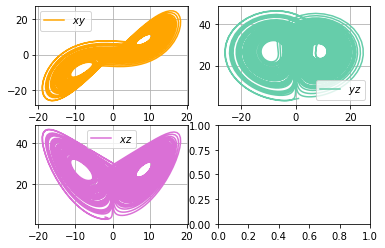

In [23]:
fig, ax = plt.subplots(2,2)
ax[0,0].plot(soluciones[:,0],soluciones[:,1],label="$xy$",color = 'orange')
ax[0,1].plot(soluciones[:,1],soluciones[:,2],label="$yz$",color = 'mediumaquamarine')
ax[1,0].plot(soluciones[:,0],soluciones[:,2],label="$xz$",color = 'orchid')

ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()

ax[0,0].grid()
ax[0,1].grid()
ax[1,0].grid()

In [24]:
def sEDO(x,t):
    dx1=10*(x[1]-x[0])
    dx2=x[0]*(28-x[2])-x[1]
    dx3=x[0]*x[1]-(8/3)*x[2]
    return array([dx1,dx2,dx3]) 

In [25]:
tiempo3 = arange(0,2,0.1)
p_ini = [1.0,0,0]
sol_RK4 = RK_4(sEDO,p_ini,tiempo3)
sol_ODEint = odeint(sEDO,p_ini,tiempo3)

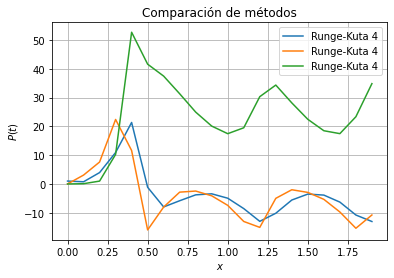

In [26]:
title("Comparación de métodos"),xlabel("$x$"),ylabel("$P(t)$")
plot(tiempo3,sol_RK4,label="Runge-Kuta 4")
grid(), legend()
show()

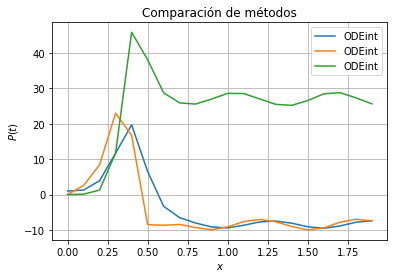

In [27]:
title("Comparación de métodos"),xlabel("$x$"),ylabel("$P(t)$")
plot(tiempo3,sol_ODEint,label="ODEint")
grid(), legend()
show()

In [28]:
tiempo4 = arange(0,2,0.1)
p_1 = [1.0,0.1,0]
p_2 = [1.0,0.2,0]
p_3 = [1.0,0.3,0]
sol_ODEint1 = odeint(sEDO,p_1,tiempo4)
sol_ODEint2 = odeint(sEDO,p_2,tiempo4)
sol_ODEint3 = odeint(sEDO,p_3,tiempo4)

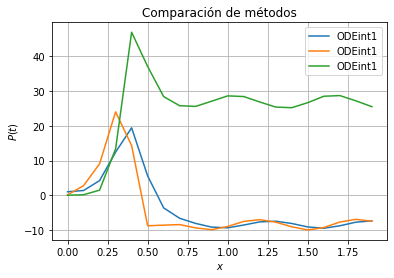

In [29]:
title("Comparación de métodos"),xlabel("$x$"),ylabel("$P(t)$")
plot(tiempo4,sol_ODEint1,label="ODEint1")
grid(), legend()
show()

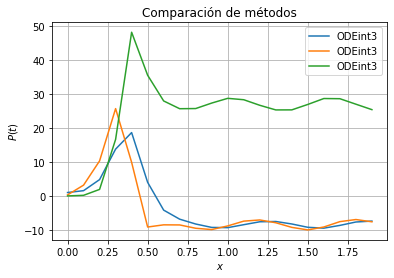

In [30]:
title("Comparación de métodos"),xlabel("$x$"),ylabel("$P(t)$")
plot(tiempo4,sol_ODEint3,label="ODEint3")
grid(), legend()
show()

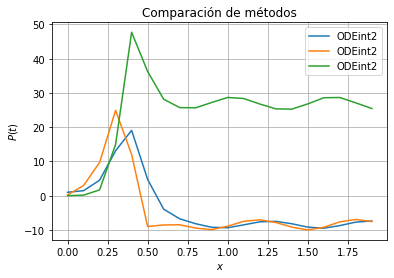

In [31]:
title("Comparación de métodos"),xlabel("$x$"),ylabel("$P(t)$")
plot(tiempo4,sol_ODEint2,label="ODEint2")
grid(), legend()
show()